<a href="https://colab.research.google.com/github/danielka777/Forwards/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
!git clone https://github.com/danielka777/Forwards.git &> /dev/null

In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Подготовка данных

In [ ]:
excel_data = pd.read_excel('/content/Forwards/Forwards.xlsx')
data = pd.DataFrame(excel_data)
#Парсинг данных, данные из файла (таблица Excel) образуют матрицу признаков 

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 1,Вес мин,Длина мин,Ширина мин,Высота мин,Дорожный просвет,Steering angle,Ширина шин,Диаметр шин,Мощн двигателя,Tractive force,Макс скорость,Бак,Tank volume,Грузоподъемность
0,Ponsse,Wisent,16300,9080,2690,3810,645,44.0,710,1340,145,165,20,150,130,12000
1,NaN,Mammoth,28500,11090,3168,4000,770,42.5,780,1525,210,320,20,265,90,25000
2,NaN,Elk,17700,9380,2690,3860,670,44.0,710,1340,145,175,20,150,130,13000
3,NaN,Elephant King,22900,10150,3070,3990,800,44.0,710,1340,210,240,20,260,170,20000
4,NaN,Elephant,22000,10150,2990,3990,800,44.0,710,1340,205,220,20,260,170,18000


In [ ]:
#предпроцессинг
#центирирование и стандартизация
df = data.iloc[:,2:]
for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [ ]:
df #Матрица признаков(данные центрированы и стандартизованы)

,Вес мин,Длина мин,Ширина мин,Высота мин,Дорожный просвет,Steering angle,Ширина шин,Диаметр шин,Мощн двигателя,Tractive force,Макс скорость,Бак,Tank volume,Грузоподъемность
0,-0.654702,-0.982185,-0.659529,-0.089590,-0.413878,0.448687,0.214057,0.346933,-0.678101,-0.673442,-0.134610,-0.808718,-0.331444,-0.516574
1,2.774597,1.529673,1.671708,1.533543,1.450868,-0.098150,1.484442,2.536893,1.144790,2.910147,-0.134610,2.029390,-1.721370,2.658009
2,-0.261176,-0.607281,-0.659529,0.337550,-0.040929,0.448687,0.214057,0.346933,-0.678101,-0.442243,-0.134610,-0.808718,-0.331444,-0.272376
3,1.200493,0.354973,1.193755,1.448115,1.898407,0.448687,0.214057,0.346933,1.144790,1.060553,-0.134610,1.905994,1.058482,1.437016
4,0.947512,0.354973,0.803590,1.448115,1.898407,0.448687,0.214057,0.346933,1.004568,0.598154,-0.134610,1.905994,1.058482,0.948618
5,0.553985,0.917330,0.803590,0.764691,0.854149,0.448687,0.214057,0.346933,1.144790,0.366955,-0.134610,0.425242,1.058482,0.948618
6,-0.008195,-0.319854,0.340269,0.337550,0.108251,0.448687,0.214057,0.346933,1.144790,-0.211043,-0.134610,0.425242,1.058482,-0.028177
7,0.947512,0.329980,0.608508,0.679263,0.108251,0.448687,0.214057,0.346933,1.144790,0.366955,-0.134610,0.795430,-0.852666,0.460221
8,1.228602,1.242246,1.096214,0.790319,1.197262,0.084129,0.939991,0.346933,1.060657,1.754150,-0.134610,0.672034,-0.331444,1.437016
9,1.200493,1.254743,1.096214,0.790319,1.197262,0.084129,0.939991,0.346933,1.060657,1.522951,-0.134610,0.672034,-0.331444,0.948618


In [ ]:
#матрица ковариации
covmat = df.cov()

In [ ]:
covmat

,Вес мин,Длина мин,Ширина мин,Высота мин,Дорожный просвет,Steering angle,Ширина шин,Диаметр шин,Мощн двигателя,Tractive force,Макс скорость,Бак,Tank volume,Грузоподъемность
Вес мин,1.000000,0.842151,0.839464,0.852999,0.862497,0.225780,0.651843,0.806983,0.881319,0.947276,-0.044672,0.820390,0.254836,0.948294
Длина мин,0.842151,1.000000,0.599510,0.645962,0.727914,0.342682,0.553327,0.693433,0.844362,0.855058,-0.323549,0.798031,0.266381,0.767501
Ширина мин,0.839464,0.599510,1.000000,0.831069,0.765396,0.151833,0.683084,0.629499,0.736094,0.766218,0.254852,0.654181,0.332142,0.874251
Высота мин,0.852999,0.645962,0.831069,1.000000,0.859467,0.129605,0.519353,0.691050,0.751959,0.759399,0.259258,0.667544,0.401398,0.867825
Дорожный просвет,0.862497,0.727914,0.765396,0.859467,1.000000,0.206189,0.517193,0.759299,0.799474,0.814489,-0.048067,0.768277,0.415303,0.864592
Steering angle,0.225780,0.342682,0.151833,0.129605,0.206189,1.000000,0.543019,0.275310,0.094198,0.139993,-0.181884,0.246097,-0.147897,0.051045
Ширина шин,0.651843,0.553327,0.683084,0.519353,0.517193,0.543019,1.000000,0.586147,0.475109,0.612036,-0.032449,0.508750,0.076466,0.581158
Диаметр шин,0.806983,0.693433,0.629499,0.691050,0.759299,0.275310,0.586147,1.000000,0.679940,0.731067,0.011176,0.599172,0.183753,0.737927
Мощн двигателя,0.881319,0.844362,0.736094,0.751959,0.799474,0.094198,0.475109,0.679940,1.000000,0.881022,-0.201349,0.824211,0.439477,0.867262
Tractive force,0.947276,0.855058,0.766218,0.759399,0.814489,0.139993,0.612036,0.731067,0.881022,1.000000,-0.163307,0.818246,0.224486,0.924498


# Метод главных компонент

In [ ]:
#сингулярное разложение
u, s, v = np.linalg.svd(covmat, full_matrices=True)

In [ ]:
s #сингулярные числа

array([8.73944916, 1.56063564, 1.37722041, 0.77309063, 0.44167296,
       0.34065448, 0.23336644, 0.15191779, 0.12043189, 0.08531805,
       0.06320918, 0.06035632, 0.02879936, 0.02387771])

In [ ]:
px.line(s)

Вопрос о числе собственных векторов v, используемых в преобразовании, и определяющем размерность матрицы главных компонент K (т.е. число «приведенных» признаков), решается с учетом соотношения эффективного ранга приближения после востановления:

In [ ]:
#Из матрицы правых собственном векторов(V) последовательно «вынимаем» векторы-столбцы 
#получаем матрицу поворота Rot
vt = np.transpose(v)
rot = vt[:,0:2] #матрица поворота

In [ ]:
rot #матрица поворота

array([[-0.32978172,  0.01046428],
       [-0.2933393 , -0.23827524],
       [-0.29147142,  0.23050511],
       [-0.2958473 ,  0.27097436],
       [-0.30790077,  0.07180975],
       [-0.08658208, -0.53249642],
       [-0.23058032, -0.21057232],
       [-0.27490428, -0.02160227],
       [-0.30841508,  0.00248536],
       [-0.31752405, -0.0402887 ],
       [ 0.02736123,  0.62090782],
       [-0.29233756, -0.16089235],
       [-0.12648723,  0.22400921],
       [-0.32175393,  0.14077257]])

In [ ]:
dff = df.to_numpy() #матрица признаков
dff.shape #размерность матрицы признаков 39*14

(39, 14)

In [ ]:
rot.shape #размерность матрицы повротов 14*2

(14, 2)

In [ ]:
K = np.dot(dff, rot) #матрица главных компонент
K

array([[ 1.53045476, -0.34531921],
       [-6.29414102, -0.28141737],
       [ 0.89752002, -0.26294438],
       [-3.89144288,  0.44965912],
       [-3.34707917,  0.30660476],
       [-2.39550151,  0.1562177 ],
       [-0.85829837,  0.05480124],
       [-1.75052932, -0.37782078],
       [-3.51563121, -0.11225095],
       [-3.27947204, -0.17496102],
       [ 0.2017587 ,  0.5985778 ],
       [ 0.1207607 ,  0.6059534 ],
       [ 2.79629272, -0.19230761],
       [ 3.79148005,  0.19402127],
       [-5.05334817,  1.0615563 ],
       [-1.74908618,  0.71806518],
       [ 0.46284277,  1.23772703],
       [ 1.45742682,  0.6372025 ],
       [ 3.65771681,  0.7957197 ],
       [ 2.45126028,  0.47582254],
       [ 2.88941979,  0.20026911],
       [ 1.9084502 ,  0.3159037 ],
       [ 0.47788537,  0.50970999],
       [ 0.18908527,  0.44583014],
       [-0.12456936,  0.50626721],
       [-3.35642094,  1.41522186],
       [ 6.47535604,  1.8696652 ],
       [ 5.04628369,  2.12374171],
       [ 1.2156942 ,

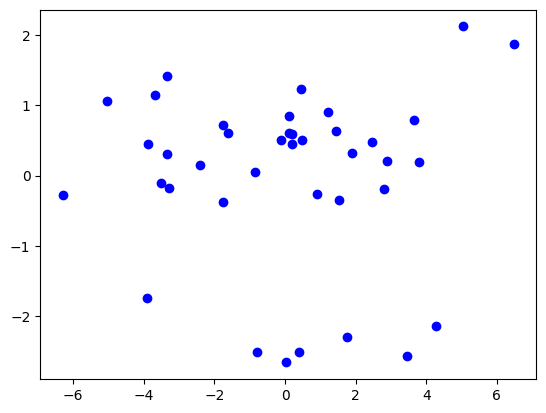

In [ ]:
plt.plot(K[:,0], K[:,1], 'bo')

# Кластеризация

In [ ]:
k = 4 #количетсво кластеров
n = len(K)  #количество строк
dim = len(K[0]) #размерность точек (пространства)

cluster — двумерный массив размерностью dim * k, содержащий k точек — центры кластеров;

cluster_content — массив, содержащий в себе k массивов — массивов точек принадлежащих соответствующему кластеру.

In [ ]:
#При помощи функции data_ditribution() произведено первичное распределения точек по кластерам
def data_distribution(array, cluster):  
	cluster_content = [[] for i in range(k)]
  
	for i in range(n):
		min_distance = float('inf')
		situable_cluster = -1
		for j in range(k):
			distance = 0
			for q in range(dim):
				distance += (array[i][q]-cluster[j][q])**2
						
			distance = distance**(1/2)
			if distance < min_distance:
				min_distance = distance
				situable_cluster = j

		cluster_content[situable_cluster].append(array[i])
		
	return cluster_content


#После распределения точек по центрам кластеров происходит 
#перераспределение уже центров кластеров по привязанным к ним точкам
def cluster_update(cluster, cluster_content, dim):
	k = len(cluster)
	for i in range(k): #по i кластерам
		for q in range(dim): #по q параметрам
			updated_parameter = 0
			for j in range(len(cluster_content[i])): 
				updated_parameter += cluster_content[i][j][q]
			if len(cluster_content[i]) != 0:
				updated_parameter = updated_parameter / len(cluster_content[i])
			cluster[i][q] = updated_parameter
	return cluster

#Первичные центры кластеров созданы с помощью библиотеки random
def clusterization(array, k):
	n = len(array)  
	dim = len(array[0])  

	cluster = [[0 for i in range(dim)] for q in range(k)] 
	cluster_content = [[] for i in range(k)] 

	for i in range(dim):
		for q in range(k):
			cluster[q][i] = random.randint(-6, 6) 

	cluster_content = data_distribution(array, cluster)

	privious_cluster = copy.deepcopy(cluster)
	while 1:
		cluster = cluster_update(cluster, cluster_content, dim)
		cluster_content = data_distribution(array, cluster)
		if cluster == privious_cluster:
			break
		privious_cluster = copy.deepcopy(cluster)
	
	return cluster_content

In [ ]:
#Визуализация 
def visualisation_2d(cluster_content):

	k = len(cluster_content)
	plt.grid() 
	plt.xlabel("x")    
	plt.ylabel("y")

	for i in range(k): 
		x_coordinates = []
		y_coordinates = []
		for q in range(len(cluster_content[i])):
			x_coordinates.append(cluster_content[i][q][0])
			y_coordinates.append(cluster_content[i][q][1])
		plt.scatter(x_coordinates, y_coordinates)
	plt.show()

In [ ]:
clustered = clusterization(K, 4) #кластеризация матрицы главных компонент

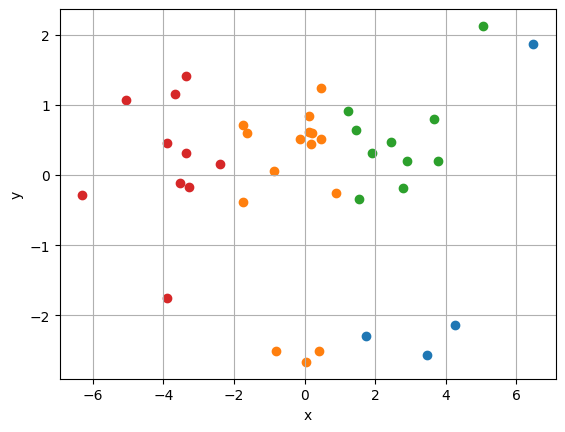

In [ ]:
visualisation_2d(clustered) #визуализация